# |  **Design A/B Test**

**Bussines problem** : 
Our client has been using the same design for a long time and is considering switching to a new design. 
They are looking for insight into whether this new method can deliver a higher return compared to the old one. A/B testing was conducted over a 40-day period and our role was to analyse the results of this testing.
The primary metric for judging success in this scenario is 'Purchase'. As a result, statistical analyses should prioritise the evaluation of the 'Purchase' criterion.





**Data story**:
+ There are two separate data sets as Control and Test group.
+ The old design was applied to the control group and the new proposal was applied to the test group.

#####  **Project Tasks**
Set up Hypotheses > Assumption Check > Apply Hypothesis > Interpret results 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, ttest_ind

----

In [21]:
df_control = pd.read_csv('C:/Jupter/DATASETS/ab test data/control_group.csv')

df_test = pd.read_csv('C:/Jupter/DATASETS/ab test data/test_group.csv')

Let's visualise

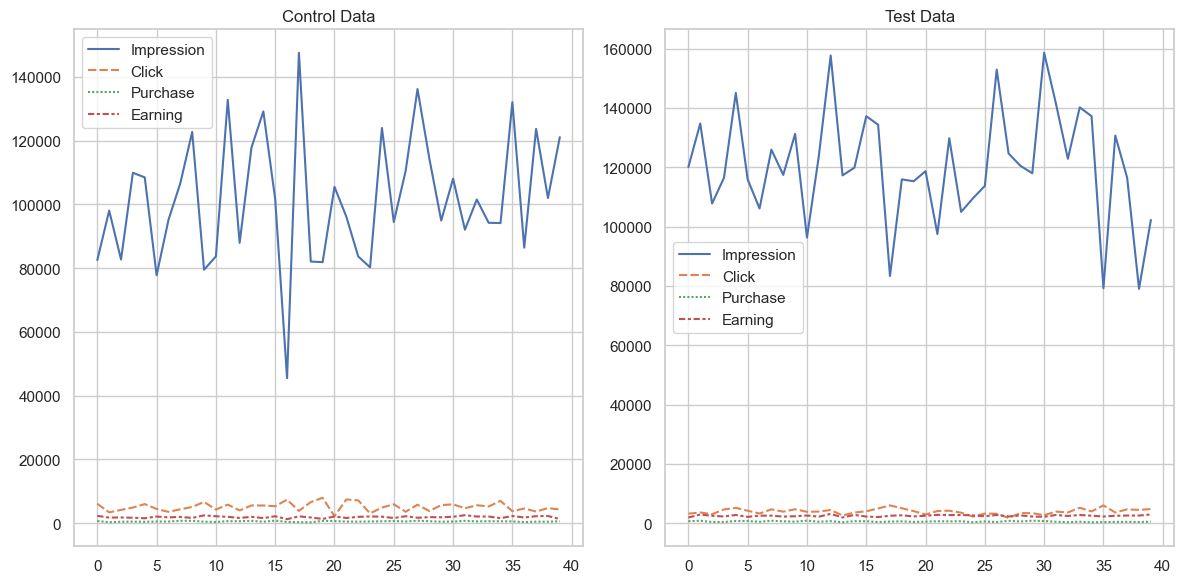

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  

sns.lineplot(data=df_control, ax=axs[0])
axs[0].set_title('Control Data')

sns.lineplot(data=df_test, ax=axs[1])
axs[1].set_title('Test Data')

plt.tight_layout()
plt.show()

Basic Statistics

In [23]:
print("Control Group Basic Statistics:")
print(df_control.describe())

print("\nTest Group Basic Statistics:")
print(df_test.describe())

Control Group Basic Statistics:
          Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   101711.450000  5100.625000  550.900000  1908.575000
std     20302.122984  1329.957772  134.110517   302.868329
min     45476.000000  2190.000000  267.000000  1254.000000
25%     85726.750000  4124.250000  470.500000  1685.750000
50%     99790.500000  5001.500000  531.500000  1975.000000
75%    115212.500000  5923.500000  638.000000  2120.000000
max    147539.000000  7959.000000  802.000000  2497.000000

Test Group Basic Statistics:
          Impression        Click    Purchase      Earning
count      40.000000    40.000000   40.000000    40.000000
mean   120512.425000  3967.550000  582.050000  2514.925000
std     18807.466616   923.071766  161.175164   282.707912
min     79034.000000  1837.000000  312.000000  1940.000000
25%    112692.250000  3376.500000  444.750000  2280.250000
50%    119291.500000  3931.500000  551.000000  2544.5

Let's combine the two data sets 

In [24]:
df_control['Group'] = 'control'
df_test['Group'] = 'test'

df_combined = pd.concat([df_control, df_test], axis=0)

df_combined.head()

,Impression,Click,Purchase,Earning,Group
0,82529,6090,665,2311,control
1,98050,3383,315,1743,control
2,82696,4168,458,1798,control
3,109914,4911,487,1696,control
4,108458,5988,441,1544,control


##### **Set up Hypotheses** 

+ H0: M1 **=** M2     

    The means of the two groups are **equal**, there is no significant difference between them


+ H1: M1 **!=** M2   

    The means of the two groups are **different**, there is a significant difference between them

Before the hypothesis test, make assumption checks. These are *Normality Assumption* and *Variance Homogeneity*.
We will test whether the control and test groups comply with the normality assumption separately on the Purchase variable.

##### **Assumption Check**

In [26]:
# Assumption of normality for the control group
test_stat, pvalue = shapiro(df_control['Purchase'])
print('Control Group - Purchase - Shapiro Test: Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Control Group - Purchase - Shapiro Test: Test Stat = 0.9774, p-value = 0.5929


In [27]:
# Assumption of normality for the test group
test_stat, pvalue = shapiro(df_test['Purchase'])
print('Test Group - Purchase - Shapiro Test: Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Group - Purchase - Shapiro Test: Test Stat = 0.9589, p-value = 0.1541


##### Inferences
+ Since the p-values of both groups are greater than 0.05, the null hypothesis cannot be rejected.
+ This means that the Purchase variable values of both groups fit the normal distribution.
+ Since the assumption of normality is met, the independent two sample t-test (parametric test) will be applicable.
However, a homogeneity of variance test should also be performed before making a full decision.

In [28]:
# Test for homogeneity of variance
test_stat, pvalue = levene(df_control['Purchase'], df_test['Purchase'])
print('Homogeneity of Variance - Levene`s Test: Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Homogeneity of Variance - Levene`s Test: Test Stat = 2.6403, p-value = 0.1082


##### Inferences
+ Since the p-value value is greater than 0.05, there is a statistically significant difference between the variances.
There is no significant difference.
In other words, the assumption of homogeneity of variance is met.
+ Therefore, independent two sample t test (parametric test) can be applied.

##### **Apply Hypothesis**

In [29]:
test_stat, pvalue = ttest_ind(df_control['Purchase'], df_test['Purchase'], equal_var=True)
print('Independent Two Sample T Test: Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Independent Two Sample T Test: Test Stat = -0.9396, p-value = 0.3503


 ##### **Interpret results** 

+ Since the p-value is greater than 0,05, there is no statistically significant difference between the average purchase between the control and test groups.

+ Therefore, it can be concluded that there is no significant difference between the control group and the test group regarding the exchange of "old" and "new" designs.

##### **Advise**

+ According to the results obtained, there is no **significant difference** between the control and test groups regarding the conversion of the "old" and "new" methods.

+ Therefore, there is no statistically significant evidence as to whether the "new" design type tested provides more conversion than the "old" design type.

+ Therefore, we can state that there is no reason for the customer to choose between the two designs at this time.
However, it may be advisable to carry out a more thorough analysis, taking into account the client's long-term performance and other factors.